In [131]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import user, password, host
from pydataset import data
from scipy import stats

alf = 0.05


### Overview

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?


In [132]:
# H0 : New Network Latency <= Old Internet Latency 
# Ha : New Network Latency > Old Internet Latency


- Is the website redesign any good?


In [133]:
# H0 : User Satisfaction/ User Clicks of new Website <= Previous Website
# Ha : User Satisfaction/ User Clicks of new Website > Previous Website

- Is our television ad driving more sales?

In [134]:
# H0 : Average Sales after Ad <= Average Sales before Ad
# Ha : Average Sales after Ad > Average Sales before Ad

### T-Test

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


In [135]:
off_1_mean = 90
off_1_sd = 15
off_1_sales = 40
off_2_sales = 50
off_2_mean = 100
off_2_sd = 20
home_alf = 0.05

In [136]:
off_1 = stats.norm(off_1_mean, off_1_sd).rvs(off_1_sales)
off_2 = stats.norm(off_2_mean, off_2_sd).rvs(off_2_sales)

In [137]:
stat, p_val = stats.levene(off_1, off_2)
if p_val < home_alf:
    print("We can reject H0; they're inequal.")

- H0: Sales time for Office 1 is the same as Office 2
- Ha: The Average Sales time for Office 1 and 2 are inequal to each other.

In [138]:
t_stat, p_val = stats.ttest_ind(off_1, off_2, equal_var=False) # Levene test gave us the equal_var, by disproving N0 we enter False.
if p_val < home_alf:
    print("We can reject the Null Hypothosis. There is some difference.")
else:
    print("We cannot reject the Null Hypothosis, there is little to no difference.")

We can reject the Null Hypothosis. There is some difference.



Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [139]:
mpg = data('mpg')
mpg.head(), mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


(  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
 1         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
 2         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
 3         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
 4         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
 5         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact,
 None)

In [140]:
mpg ['avg_fuel'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [141]:
mpg_2008 = mpg.avg_fuel[mpg.year == 2008]
mpg_1999 = mpg.avg_fuel[mpg.year == 1999]

(<AxesSubplot:>, <AxesSubplot:>)

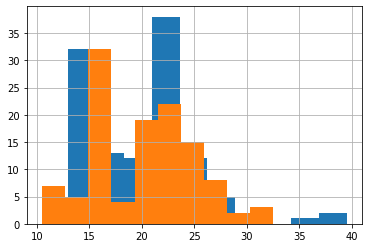

In [142]:
mpg_1999.hist(), mpg_2008.hist() # Added these to check how they compare to Harmonic version.

<AxesSubplot:>

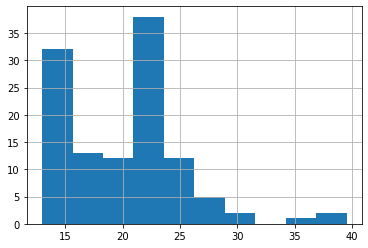

In [143]:
mpg_1999.hist()

<AxesSubplot:>

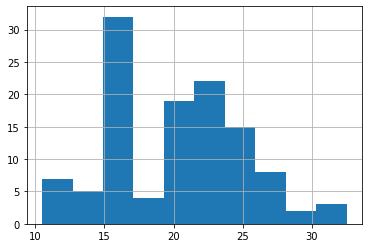

In [144]:
mpg_2008.hist()

In [145]:
mpg_1999.shape, mpg_2008.shape 
# Hmm.. the shape is the same even as the Harmonic Mean,
# but the numbers are very different. I wonder why.

((117,), (117,))

In [146]:
stat, p_val = stats.levene(mpg_1999, mpg_2008)
if p_val < alf:
    print("We can reject the Null Hypothesis, variances appear inequal.")
else:
    print("variances appear equal, we cannot reject the Null Hypothesis.")

variances appear equal, we cannot reject the Null Hypothesis.


In [147]:
t_stat, p_val = stats.ttest_ind(mpg_1999, mpg_2008)
t_stat, p_val

(0.21960177245940962, 0.8263744040323578)

In [148]:
if p_val < alf:
    print("We can reject the Null Hypothesis; there is a difference in average fuel_efficency.")
else:
    print("We cannot reject the Null Hypothesis; there is no difference in average fuel_efficency between cars from 1999 and 2008.")

We cannot reject the Null Hypothesis; there is no difference in average fuel_efficency between cars from 1999 and 2008.


In [149]:
# I didn't know there was a Harmonic Mean, 
# and that's how the teacher solved it, 
# so below is the Harmonic Mean version:

In [150]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,19.809524


In [151]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

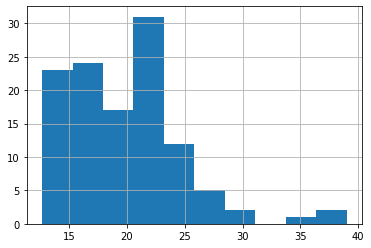

In [152]:
fe_1999.hist()

<AxesSubplot:>

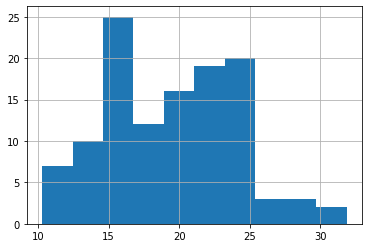

In [153]:
fe_2008.hist()

(<AxesSubplot:>, <AxesSubplot:>)

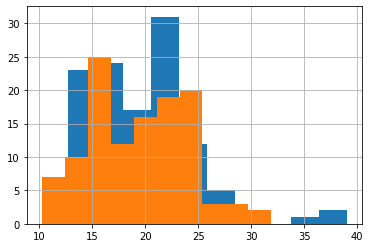

In [154]:
fe_1999.hist(),fe_2008.hist()

In [155]:
fe_2008.shape, fe_1999.shape 
# Showing off that even though they look different plotted, their shape is the 'same'

((117,), (117,))

In [156]:
## Conclusions are the same as above, with just slightly varied numbers.
#  I'm curious why we picked Harmonic Mean then.

- H0: Compact cars average mileage <= average mileage for all vehicles
- Ha: Compact cars average mileage > average mileage for all vehicles.

In [157]:
# for Ha to be true, t > 0 and p/2 < 0.05
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [158]:
compact_mpg = mpg.avg_fuel[mpg['class'] == 'compact'] 
# I just don't want to go through and change the class table title right this second,
# and it's not going to be used enough to warrant the change.
avg_mpg = mpg.avg_fuel.mean()

In [159]:
t_stat, p_val = stats.ttest_1samp(compact_mpg, avg_mpg) #This is one sample vs the 'population' so it's a 1samp t-test.
if (t_stat > 0) and ((p_val/2) < alf):
    print("We can reject the Null Hypothesis; Compact cars appear to have a higher average mpg vs other cars.")
else:
    print("We cannot reject the Null Hypothesis")

We can reject the Null Hypothesis; Compact cars appear to have a higher average mpg vs other cars.


- H0 : Average Mileage of Manual Car <= Average Mileage of Automatic Cars
- Ha : Average Mileage of Manual Car > Average Mileage of Automatic Cars

In [160]:
man_avg = mpg.avg_fuel[mpg.trans.str.contains('manual')]
auto_avg = mpg.avg_fuel[mpg.trans.str.contains('auto')]

In [161]:
stat, p_val = stats.levene(man_avg, auto_avg)
if (p_val < alf):
    print("Equal Var = False")
else:
    print("Cannot reject idea of Equal Variables.")

Cannot reject idea of Equal Variables.


In [162]:
t_stat, p_val = stats.ttest_ind(man_avg, auto_avg) 
# If p_val < alpha above, we'd include equal_var=False after the two inputs.

In [163]:
if (t_stat > 0) and ((p_val/2) < alf):
    print("We can reject our Null Hypothesis; Average Mileage of Manuals cars is better that automatics.")
else:
    print("We cannot reject our Null Hypothesis; Average Mileage of Manuals is equal or less than automatics.")

We can reject our Null Hypothesis; Average Mileage of Manuals cars is better that automatics.


### Correlation


In [164]:
url1 = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'
url2 = f'mysql+pymysql://{user}:{password}@{host}/employees'

query1 = '''
SELECT * FROM customers
'''
# Apparently I only want Current Employees so I'm fixing this.
queryjoin = '''
SELECT * FROM employees e
JOIN salaries s
USING (emp_no)
WHERE s.to_date = '9999-01-01'
'''


In [165]:
tc_df = pd.read_sql(query1,url1)

In [166]:
emp_df = pd.read_sql(queryjoin,url2)

In [167]:
# I wanted to make sure salary and title was accurately portrayed, 
# using .head(20) the title results were static, 
# so I had to check the tail to see if that was just how that employee's time went
# or if it was a loading/joining issue.
emp_df.tail(20)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
240104,499974,1956-09-10,Shuichi,Piazza,F,1989-09-16,50961,2001-12-10,9999-01-01
240105,499976,1963-08-20,Guozhong,Felder,M,1988-12-26,107386,2001-12-23,9999-01-01
240106,499977,1956-06-05,Martial,Weisert,F,1996-09-17,77858,2001-12-27,9999-01-01
240107,499979,1962-10-29,Prasadram,Waleschkowski,M,1994-01-04,54088,2001-08-28,9999-01-01
240108,499980,1959-06-28,Gino,Usery,M,1991-02-11,108364,2002-02-08,9999-01-01
240109,499981,1955-01-02,Yunming,Mitina,F,1991-03-07,63193,2002-03-04,9999-01-01
240110,499983,1955-08-29,Uri,Juneja,F,1989-08-28,52429,2002-07-13,9999-01-01
240111,499984,1959-08-31,Kaijung,Rodham,M,1985-09-11,66202,2002-07-27,9999-01-01
240112,499985,1964-12-26,Gila,Lukaszewicz,M,1997-02-11,47543,2002-02-10,9999-01-01
240113,499986,1952-07-22,Nathan,Ranta,F,1985-08-11,119906,2001-08-07,9999-01-01


In [168]:
sleep_df = data('sleepstudy')

1. Use the telco_churn data. 
- Does tenure correlate with monthly charges? 
- Total charges? 
- What happens if you control for phone and internet service?


In [169]:
tc_df.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,No,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,71,Yes,No,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,3,109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,2,Yes,...,No,Yes,No,No,3,Yes,4,84.65,5377.8,No
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,No,1,Yes,1,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,Yes,3,Yes,2,90.45,5957.9,No


In [170]:
# The DB one is proper, but if loaded the csv, you'd want to 
# df.columns = df.columns.str.lower() to make them lowercase since Python is case sensitive.

Tenure and Monthly Charges:

- H0: There is no linear correalation between length of tenure and monthly charges.
- Ha: There is a linear correalation between length of tenure and monthly charges.

In [171]:
#Pre-set values:
n = tc_df.shape[0]
deg_freedom = n - 2
conf_interval = .95
alf = 1 - conf_interval # same as alf = .05, alf is a personal touch for Alpha, it was the nickname of a beloved pet, and Alpha reminds me of it.

In [172]:

x = tc_df.tenure
y = tc_df.monthly_charges


In [173]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.24789985628615008, 4.0940449915016345e-99)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


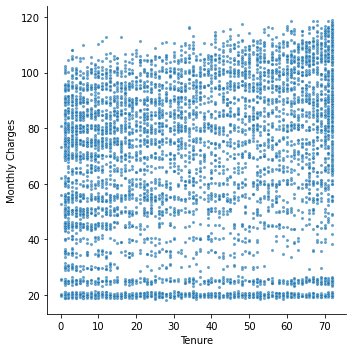

In [174]:
sns.relplot(x,y, s=10, alpha=.7)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

In [175]:
corr, p = stats.spearmanr(x,y, axis=None)
corr, p

(0.27641678933130215, 1.0271266876409408e-123)

Correlation Coefficent:

    Measured between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation.

In [176]:
round(corr, 3)

0.276

0.276 is closer to 0 than either 1 or -1, so if there is a correlation, it is weaker at best. The above scatter plot shows that Tenure and Monthly Charges are fairly evenly distributed across the board. The clusters around the lower end of monthly charges are most likely being affected by something else, and they're still uniform across length of tenure.

Tenure and Total Charges:

- H0: There is no linear relationship between Tenure and Total Charges.
- Ha: There is a linear relationship between Tenure and Total Charges.

In [177]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [178]:
# tc_df = tc_df.dropna() wasn't working, so a little creative workaround was needed. 
# Apparently I actually need more things before I can .dropna() so, this is quicker [imo] as long as it works for all the odd values.
tc_df = tc_df[tc_df.total_charges != ' ']

In [179]:
x = tc_df.tenure
y = tc_df.total_charges

In [180]:
y = y.astype(float)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


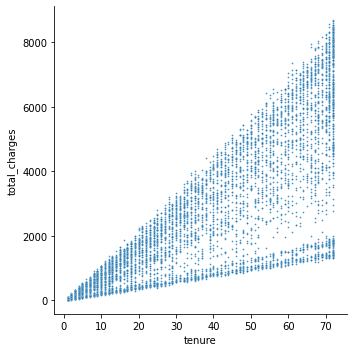

In [181]:
sns.relplot(x,y, s= 3, alpha=.8)
plt.show()

Heteroscedasticity is what this change rate is called, it's where it is clustered on one end, and tappered on the other. Homoscedasticity is the opposite which it's clustered tightly the whole way.

In [182]:
corr, p = stats.spearmanr(x, y)
corr, p

(0.8891770805365491, 0.0)

In [183]:
round(corr, 2)

0.89

Correlation is ~.89, since it's closest to 1, it's a stronger positive correlation!

In [184]:
if p < alf:
    print("We reject the Null Hypothosis.")
else:
    print("We cannot reject the Null Hypothosis")

We reject the Null Hypothosis.


Using Phone and Internet Services as a Control:

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


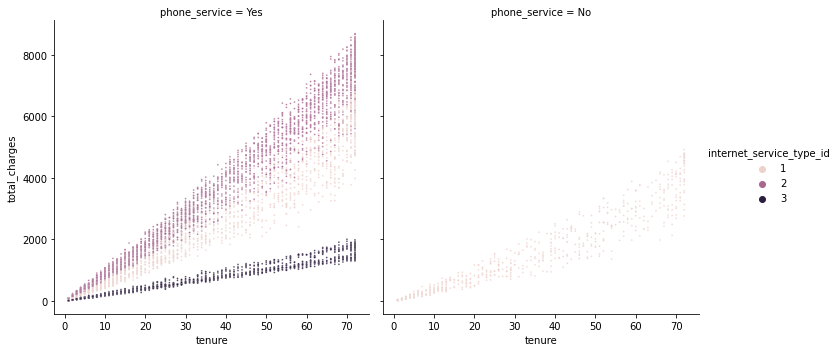

In [185]:
sns.relplot(x,y, s= 3, alpha=.8, col=tc_df.phone_service, hue=tc_df.internet_service_type_id)
plt.show()

Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [186]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


In [187]:
emp_df['tenure'] = (emp_df.to_date - emp_df.hire_date).astype(str).str.split(" ", expand=True)[0]

In [188]:
emp_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,2926512
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,2926729
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,2926449
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,2926354
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,2925338


In [189]:
emp_df.tenure.value_counts()

2926897    114
2926708    110
2926923    109
2926883    109
2926974    106
          ... 
2921589      1
2921572      1
2921757      1
2921672      1
2921554      1
Name: tenure, Length: 5425, dtype: int64

In [190]:
emp_df.tenure = emp_df.tenure.astype(int)

In [191]:
emp_df.tenure.value_counts

<bound method IndexOpsMixin.value_counts of 0         2926512
1         2926729
2         2926449
3         2926354
4         2925338
           ...   
240119    2924120
240120    2924958
240121    2926578
240122    2923846
240123    2922337
Name: tenure, Length: 240124, dtype: int64>

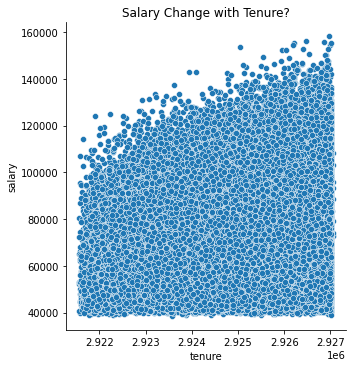

In [192]:
sns.relplot(data=emp_df, x=emp_df.tenure, y=emp_df.salary)
plt.title('Salary Change with Tenure?')
plt.show()

In [193]:
corr, p = stats.pearsonr(emp_df.tenure, emp_df.salary)
corr, p

(0.3064625613186077, 0.0)

In [194]:
if p < alf:
    print("We reject the Null Hypothesis; Salary is related to Tenure")
else: 
    print("We fail to reject the Null Hypothesis; There doesn't appear to be a correlation between salary and tenure.")

We reject the Null Hypothesis; Salary is related to Tenure


In [195]:
# The Query the Teacher wrote is much more precise and clean:
new_query = '''
SELECT emp_no
, datediff(max(to_date), min(from_date)) as tenure
, count(title) as num_titles
FROM titles
GROUP BY emp_no
HAVING max(to_date) = '9999-01-01'
;
'''

In [196]:
emp_df2 = pd.read_sql(new_query, url2)

In [197]:
emp_df2.info(), emp_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   tenure      240124 non-null  int64
 2   num_titles  240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


(None,
    emp_no   tenure  num_titles
 0   10001  2926512           1
 1   10002  2922821           1
 2   10003  2923065           1
 3   10004  2926354           2
 4   10005  2925338           2)

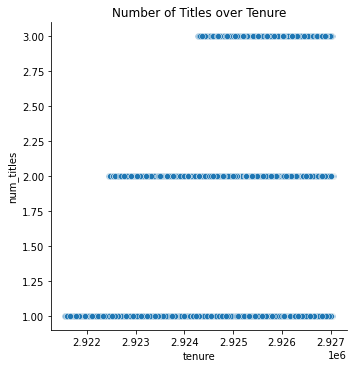

In [198]:
sns.relplot(data=emp_df2, x=emp_df2.tenure, y=emp_df2.num_titles)
plt.title("Number of Titles over Tenure")
plt.show()

In [199]:
corr, p = stats.pearsonr(emp_df2.tenure, emp_df2.num_titles)
corr, p

(0.5311014974064857, 0.0)

In [200]:
if p < alf:
    print("We reject the Null Hypothesis; Tenure and number of titles appears to have a relation.")
else:
    print("We cannot reject the Null Hypothesis; There appears to be no relation between Tenure and Number of titles.")

We reject the Null Hypothesis; Tenure and number of titles appears to have a relation.



Use the sleepstudy data. Is there a relationship between days and reaction time?

In [201]:
sleep_df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


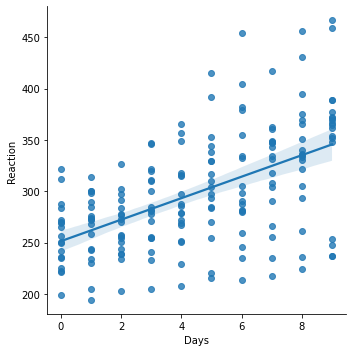

In [202]:
# Oh, teacher added a lmplot. Interesting.
sns.lmplot(data=sleep_df, x='Days', y='Reaction')
plt.show()

In [203]:
corr, p = stats.pearsonr(sleep_df.Days, sleep_df.Reaction)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

In [204]:
if p < alf:
    print("We reject the Null Hypothesis; There is a relation between Days and Reaction")
else:
    print("We cannot reject the Null Hypothesis; There doesn't appear to be a relation between days and reaction.")

We reject the Null Hypothesis; There is a relation between Days and Reaction


Chi^2

In [205]:
index = ['Uses a Macbook', "Doesn't Use a Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
                       Codeup Student  Not Codeup Student
Uses a Macbook                     49                  20
Doesn't Use a Macbook               1                  30
---
Expected
[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


- H_Null : Using a macbook is independent of being a Codeup Student
- H_A: Using a macbook is dependent upon being a Codeup Student

In [206]:

degf
nrows, ncols = observed.shape
deg_f = (nrows -1) * (ncols - 1)
if deg_f == degf:
    print(degf)

1


In [207]:
stats.chi2(degf).sf(chi2)

1.4116760526193828e-09

In [208]:
if p < alf:
    print("We reject the Null Hypothosis.")
else:
    print("We cannot reject the Null Hypothosis")

We reject the Null Hypothosis.


So being a codeup student is dependent with using a mac book

2. MPG

In [209]:
mpg = data('mpg')
# For Lesson they cleaned up transmisssion by creating a new column and filtering out the last 4 characters which were all the sub types of automatic/manual:
# mpg['transmission'] = mpg.trans.str[:-4]
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [210]:
# Maybe we'll try Cylinder vs AVG MPG
mpg['avg_mpg'] = (mpg.hwy + mpg.cty)/ 2

In [211]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


- H_Null: Cynlinders have no bearing on average mpg.
- H_Alt: Cylinders are relative to average mpg.

In [212]:
n = mpg.shape[0]

cyl_proportions = mpg.cyl.value_counts() / n
cyl_proportions

4    0.346154
6    0.337607
8    0.299145
5    0.017094
Name: cyl, dtype: float64

In [213]:
avg_mpg_proportions = mpg.avg_mpg.value_counts() / n
avg_mpg_proportions

22.0    0.081197
15.0    0.072650
25.0    0.059829
15.5    0.055556
22.5    0.051282
23.5    0.047009
21.0    0.042735
20.5    0.042735
13.0    0.042735
17.0    0.038462
16.0    0.034188
19.5    0.034188
14.0    0.029915
23.0    0.025641
24.0    0.025641
18.0    0.025641
26.0    0.025641
10.5    0.021368
21.5    0.021368
20.0    0.021368
25.5    0.021368
16.5    0.021368
19.0    0.017094
30.5    0.017094
17.5    0.012821
18.5    0.012821
14.5    0.012821
13.5    0.012821
12.5    0.008547
27.0    0.008547
28.5    0.008547
30.0    0.008547
28.0    0.008547
27.5    0.004274
26.5    0.004274
32.5    0.004274
38.5    0.004274
39.5    0.004274
35.0    0.004274
24.5    0.004274
Name: avg_mpg, dtype: float64

In [214]:
observed = pd.crosstab(mpg.cyl, mpg.avg_mpg)
observed

avg_mpg,10.5,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0,16.5,...,27.0,27.5,28.0,28.5,30.0,30.5,32.5,35.0,38.5,39.5
cyl,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,2,1,2,2,2,4,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,2,7,6,1,...,0,0,0,0,0,0,0,0,0,0
8,5,2,10,3,6,3,15,6,2,4,...,0,0,0,0,0,0,0,0,0,0


In [215]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0  1  0  2  2  1  4  9  4  8
   5  0 12  5  6  1  2  1  2  2  2  4  1  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  2  7  6  1  6  1  3  1  2  5  4  7  6  4 15  3  2  3
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  2 10  3  6  3 15  6  2  4  3  0  1  2  2  2  1  1  2  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
---
Expected

[[1.73076923 0.69230769 3.46153846 1.03846154 2.42307692 1.03846154
  5.88461538 4.5        2.76923077 1.73076923 3.11538462 1.03846154
  2.07692308 1.03846154 1.38461538 2.76923077 1.73076923 3.46153846
  3.46153846 1.73076923 6.57692308 4.15384615 2.07692308 3.80769231
  2.07692308 0.34615385 4.84615385 1.73076923 2.07692308 0.34615385
  0.69230769 0.34615385 0.69230769 0.69230769 0.69230769 1.38461538
  0.34615385 0.34615385 0.34615385 0.34615385]
 [0.08547009 0.03418

In [216]:
if p < alf:
    print("We reject the Null Hypothosis.")
else:
    print("We cannot reject the Null Hypothosis")

We reject the Null Hypothosis.


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


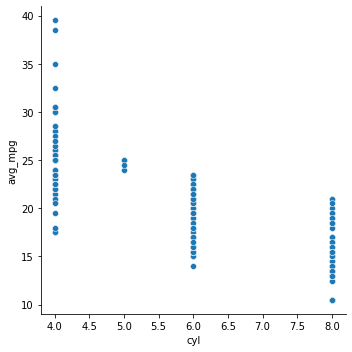

In [217]:
sns.relplot(mpg.cyl, mpg.avg_mpg)
plt.show()

So The amount of Cylinders DOES affect the average MPG. Looking at the chart you can see the more cylinders, the less average MPG.

3. Use the data from the employees database to answer these questions:


In [218]:
chi_query = '''
SELECT emp_no, gender, dept_name
FROM employees
    JOIN dept_emp
        USING (emp_no)
    JOIN departments
        USING (dept_no)
WHERE to_date = '9999-01-01'
AND dept_name IN ('Marketing','Sales')
'''
emp_df_chi = pd.read_sql(chi_query, url2)
#fixing my dup column names.

In [219]:
emp_df_chi.head()

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing



- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


In [220]:
observed = pd.crosstab(emp_df_chi.gender, emp_df_chi.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [221]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [222]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [223]:
if p < alf:
    print("We reject the Null Hypothesis.")
else:
    print("We cannot reject the Null Hypothesis.")

We cannot reject the Null Hypothesis.



- Is an employee's gender independent of whether or not they are or have been a manager?

In [224]:
# Teacher's query is much more efficient:

chi_query2 = '''
SELECT emp_no, gender, dept_no
FROM employees
    LEFT JOIN dept_manager
        USING (emp_no)
'''

In [225]:
emp_chi_df = pd.read_sql(chi_query2, url2)
emp_chi_df

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [226]:
emp_chi_df.dept_no.value_counts(dropna=False)

None    300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_no, dtype: int64

In [227]:
# I like how they filled it.
emp_chi_df.dept_no = emp_chi_df.dept_no.fillna('not manager')

In [228]:
emp_chi_df.dept_no = np.where( emp_chi_df.dept_no != 'not manager', 
                      'manager', 'not manager')

In [229]:
emp_chi_df.dept_no.value_counts()

not manager    300000
manager            24
Name: dept_no, dtype: int64

In [230]:
observed = pd.crosstab(emp_chi_df.gender, emp_chi_df.dept_no)
observed

dept_no,manager,not manager
gender,,
F,13,120038
M,11,179962


In [231]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [232]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[    13 120038]
 [    11 179962]]

Expected
[[     9 120041]
 [    14 179958]]

----
chi^2 = 1.4567
p     = 0.2275


In [233]:
if p < alf:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis
